In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号  
# import tikzplotlib
my_dict = {'s': 1, 'ms': 1e3, 'μs': 1e6 ,'ns':1e9}
# print(my_dict)
plt.rcParams.update({'axes.labelsize': 16,'xtick.labelsize': 14, 'ytick.labelsize': 14,'legend.fontsize': 12})

def mydraw2(filename,title='Waveforms on the oscilloscope',label1='CH1',label2='CH2',x_label='时间',y_label='电压/V',yrange=((),()),time_unit='s',save=''):
    if time_unit=='us':
        time_unit='μs'
    df = pd.read_csv(filename)
    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, 1].to_numpy(dtype=float)
    ch2_data = df.iloc[1:, 2].to_numpy(dtype=float)

    dt=df['Increment'][0]
    delt=df['Start'][0]
    # print('delt',delt)
    x_data=x_data*dt+delt
    x_data*=my_dict[time_unit]

    # 创建两个子图
    plt.figure(figsize=(8,4))
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ylim1,ylim2=yrange
    # 在第一个子图中绘制第一条曲线
    ax1.plot(x_data, ch1_data, label=label1, color='red')
    # ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label)
    ax1.grid(True)
    if len(ylim1)!=0:
        ymin,ymax=ylim1
        ax1.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax1.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax1.legend()

    # 在第二个子图中绘制第二条曲线
    ax2.plot(x_data, ch2_data, label=label2, color='blue')
    ax2.set_xlabel(x_label)
    ax2.set_ylabel(y_label)
    ax2.grid(True)
    if len(ylim2)!=0:
        ymin,ymax=ylim2
        ax2.set_ylim(ymin, ymax)  # 设置y轴范围为0到5
        # ax2.set_yticks(np.linspace(ymin, ymax, 5))  # 设置Y轴刻度值
    ax2.legend()
    plt.xlabel(x_label+'/'+time_unit)


    # 设置标题
    plt.suptitle(title)#,fontsize=10)

    # 调整子图之间的垂直间距
    # plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.08)
    if save!='':
        plt.savefig(save,bbox_inches='tight')
    # tikzplotlib.save("test.tex")
    # 显示图表
    plt.show()

    return x_data,ch1_data,ch2_data,time_unit

def mydraw(filename,choice=1, title='Waveform on the oscilloscope', label='CH1', x_label='Time', y_label='Voltage (V)', yrange=(), time_unit='s', save=''):
    
    if time_unit == 'us':
        time_unit = 'μs'
    
    df = pd.read_csv(filename)

    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, choice].to_numpy(dtype=float)

    dt = df['Increment'][0]
    delt = df['Start'][0]

    x_data = x_data * dt + delt
    x_data *= my_dict[time_unit]

    # 创建一个图形
    plt.figure(figsize=(8, 4))

    # 绘制CH1的数据
    plt.plot(x_data, ch1_data, label=label, color='red')

    plt.xlabel(f'{x_label}/{time_unit}')
    plt.ylabel(y_label)
    plt.title(title)

    if len(yrange) != 0:
        ymin, ymax = yrange
        plt.ylim(ymin, ymax)

    plt.grid(True)
    plt.legend()

    if save != '':
        plt.savefig(save, bbox_inches='tight')

    plt.show()

    return x_data, ch1_data, time_unit

In [37]:
import os
os.makedirs('pic',exist_ok=True)
# 获取当前目录下的所有文件
file_list = [f for f in os.listdir() if os.path.isfile(f)]

# 按文件的最后修改时间进行排序，从上到下依次是从早到晚
sorted_file_list = sorted(file_list, key=lambda x: os.path.getmtime(x))

# 打印所有文件名
for file_name in sorted_file_list:
    if file_name[-3:]=='csv':
        print(file_name)



1_wq.csv
1_z.csv
1_50.csv
1_3_1.csv


In [195]:
mydict_t = {'s': 1, 'ms': 1e3, 'μs': 1e6 ,'ns':1e9}
mydict_f = {'Hz': 1, 'kHz': 1e-3, 'MHz': 1e-6 }


def mydrawfft(filename,choice=1, title='前置放大器的输出', x_label='时间', y_label='幅值(V)', yrange=(),frange=(), time_unit='s',fre_unit='Hz', save=''):
    
    if time_unit == 'us':
        time_unit = 'μs'
    
    df = pd.read_csv(filename)

    # 提取X轴和Y轴数据
    x_data = df.iloc[1:, 0].to_numpy(dtype=float)
    ch1_data = df.iloc[1:, choice].to_numpy(dtype=float)

    dt = df['Increment'][0]
    delt = df['Start'][0]

    x_data = x_data * dt + delt
    x_data *= mydict_t[time_unit]

    n=len(x_data)
    # 计算FFT
    fft_result = np.fft.fft(ch1_data)
    fft_freqs = np.arange(n)/(n*dt) # FFT频率轴
    fft_freqs *= mydict_f[fre_unit]
    plt.figure(figsize=(12, 6))

    fig, axs = plt.subplots(2, 1, figsize=(12, 6))

    # 上面的子图：波形图
    axs[0].plot(x_data, ch1_data, color='red')
    axs[0].set_xlabel(f'{x_label}/{time_unit}')
    axs[0].set_ylabel(y_label)
    axs[0].set_title(title)
    if len(yrange) != 0:
        ymin, ymax = yrange
        axs[0].set_ylim(ymin, ymax)
    axs[0].grid(True)
    # axs[0].legend()

    axs[1].plot(fft_freqs[1:], np.abs(fft_result)[1:],color='purple')
    axs[1].set_title('FFT变换后')
    axs[1].set_xlabel(f'频率({fre_unit})')
    axs[1].set_ylabel('幅值(V)')
    if len(frange) != 0:
        fmin, fmax = frange
        axs[1].set_xlim(fmin, fmax)
    axs[1].grid(True)

    # 调整子图之间的垂直间距
    fig.align_ylabels([axs[0], axs[1]])
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    if save != '':
        plt.savefig(save, bbox_inches='tight')

    plt.show()


<Figure size 1200x600 with 0 Axes>

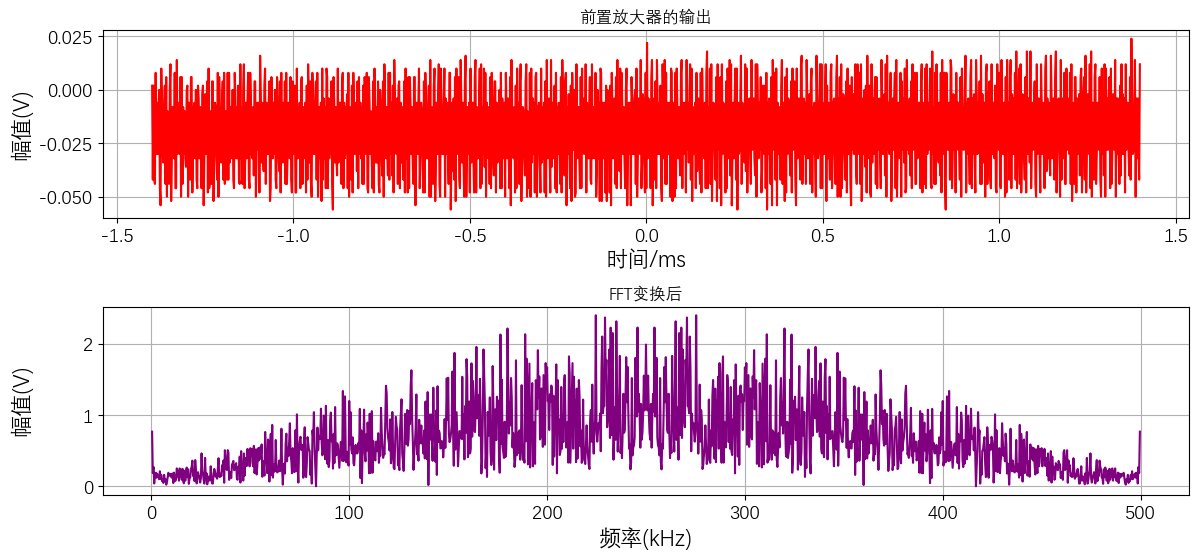

In [200]:
save='pic/taucinfty.pdf'
mydrawfft('1_wq.csv',time_unit='ms',fre_unit='kHz',save=save)

<Figure size 1200x600 with 0 Axes>

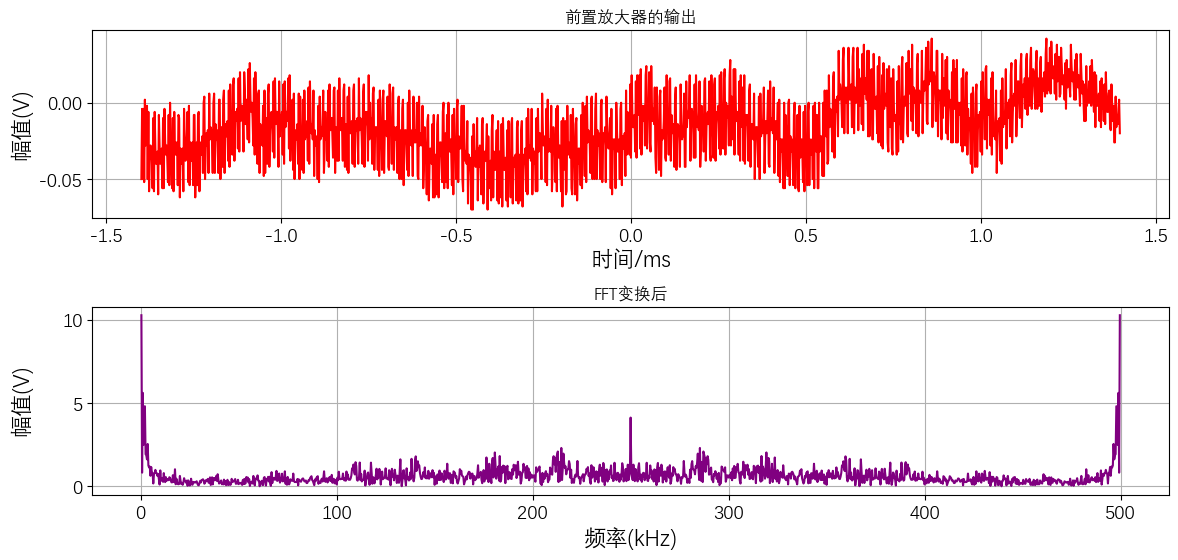

In [201]:
save='pic/tauc0.pdf'
mydrawfft('1_z.csv',time_unit='ms',fre_unit='kHz',save=save)

<Figure size 1200x600 with 0 Axes>

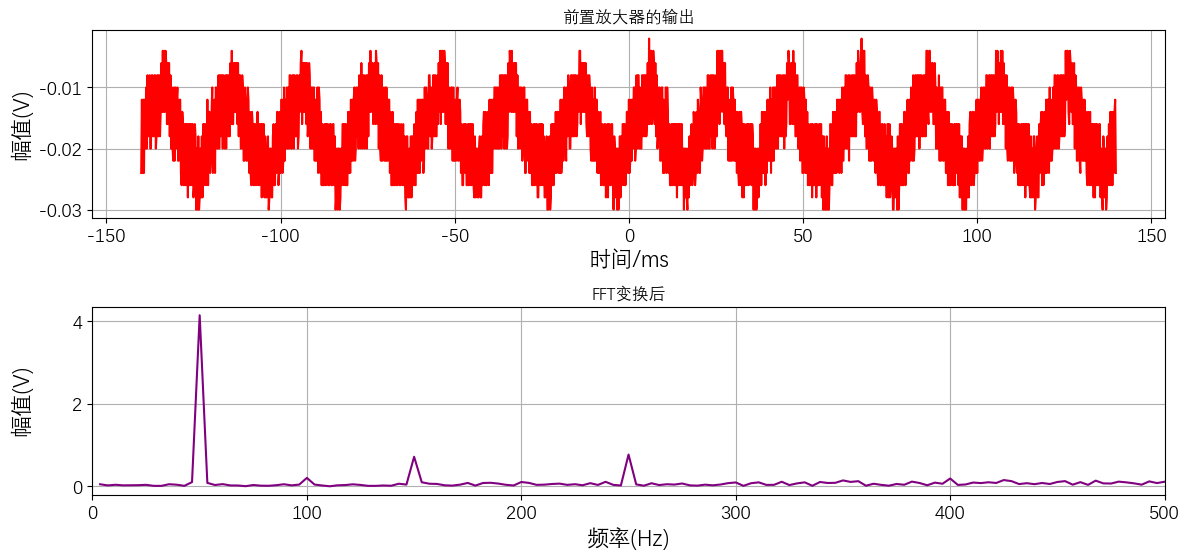

In [202]:
save='pic/50Hz.pdf'
mydrawfft('1_50.csv',time_unit='ms',fre_unit='Hz',frange=(0,500),save=save)

[ 0.          0.95105652  0.58778525 ...  0.58778525 -0.58778525
 -0.95105652]


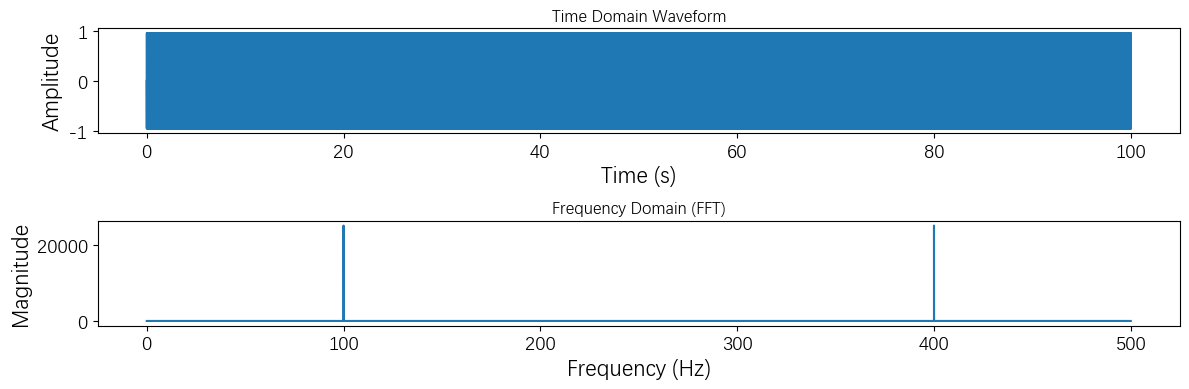

In [203]:
import numpy as np
import matplotlib.pyplot as plt

# 输入波形数据
a = 0  # 起始时间
b = 100  # 终止时间
sample_rate = 50000  # 总样率（每秒采样点数）

# 生成时间轴
t = np.linspace(a, b,  sample_rate, endpoint=False)

# 生成示例波形数据（可以替换成你的实际波形数据）
frequency = 100  # 波形的频率（Hz）
amplitude = 1.0  # 波形的振幅
waveform = amplitude * np.sin(2 * np.pi * frequency * t)  # 此处示例使用正弦波
print(np.sin(2 * np.pi * frequency * t))

# 计算FFT
d=(b-a) / sample_rate
fft_result = np.fft.fft(waveform)
fft_freqs = np.arange(len(fft_result))/(len(fft_result)*d) # FFT频率轴

# 绘制波形
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(t, waveform)
plt.title('Time Domain Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# 绘制FFT结果
plt.subplot(2, 1, 2)
plt.plot(fft_freqs, np.abs(fft_result))
plt.title('Frequency Domain (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
# plt.xlim(0, sample_rate / 2)  # 显示正频率部分
plt.tight_layout()

plt.show()
